# 1. Build and fit a model using the same data we have here but with the MobileNetV2 architecture feature extraction (mobilenet_v2_100_224/feature_vector) from TensorFlow Hub, how does it perform compared to our other models?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [3]:
import kagglehub
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import datetime
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [4]:
!pip install --upgrade kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: kagglehub
    Found existing installation: kagglehub 0.2.9
    Uninstalling kagglehub-0.2.9:
      Successfully uninstalled kagglehub-0.2.9


get dataset

In [5]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/deeplearning_cv_datasets /10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [6]:
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent

main

In [7]:
# Setup data inputs

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 750 images belonging to 10 classes.
Testing images:
Found 2500 images belonging to 10 classes.


In [8]:
# Create tensorboard callback (functionized because need to create a new one for each model)
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [9]:
MobileNet_url = kagglehub.model_download("google/mobilenet-v2/tensorFlow2/100-224-feature-vector")


  0%|          | 0.00/1.24M [00:00<?, ?B/s]



  0%|          | 0.00/8.65M [00:00<?, ?B/s]




100%|██████████| 5.13k/5.13k [00:00<00:00, 11.0MB/s]

 81%|████████  | 1.00M/1.24M [00:01<00:00, 759kB/s]

100%|██████████| 1.24M/1.24M [00:01<00:00, 895kB/s]


 23%|██▎       | 2.00M/8.65M [00:01<00:04, 1.49MB/s]

 35%|███▍      | 3.00M/8.65M [00:01<00:02, 2.37MB/s]

 58%|█████▊    | 5.00M/8.65M [00:01<00:00, 4.37MB/s]

 81%|████████  | 7.00M/8.65M [00:02<00:00, 6.72MB/s]

100%|██████████| 8.65M/8.65M [00:02<00:00, 4.26MB/s]


In [10]:

def create_model(model_url, num_classes=10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer
  ])

  return model

In [11]:
# Create model
MobileNet_model = create_model(MobileNet_url, num_classes=train_data_10_percent.num_classes)

# Compile
MobileNet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [12]:
# Fit the model
MobileNet_history = MobileNet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="MobileNetV2")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/MobileNetV2/20240917-010651
Epoch 1/5
24/24 [==============================] - 20s 612ms/step - loss: 1.9637 - accuracy: 0.3307 - val_loss: 1.2893 - val_accuracy: 0.6012
Epoch 2/5
24/24 [==============================] - 11s 474ms/step - loss: 1.0489 - accuracy: 0.7200 - val_loss: 0.8946 - val_accuracy: 0.7352
Epoch 3/5
24/24 [==============================] - 10s 449ms/step - loss: 0.7431 - accuracy: 0.8107 - val_loss: 0.7415 - val_accuracy: 0.7776
Epoch 4/5
24/24 [==============================] - 12s 537ms/step - loss: 0.5846 - accuracy: 0.8533 - val_loss: 0.6777 - val_accuracy: 0.7856
Epoch 5/5
24/24 [==============================] - 13s 540ms/step - loss: 0.4856 - accuracy: 0.8907 - val_loss: 0.6389 - val_accuracy: 0.8028


In [13]:

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

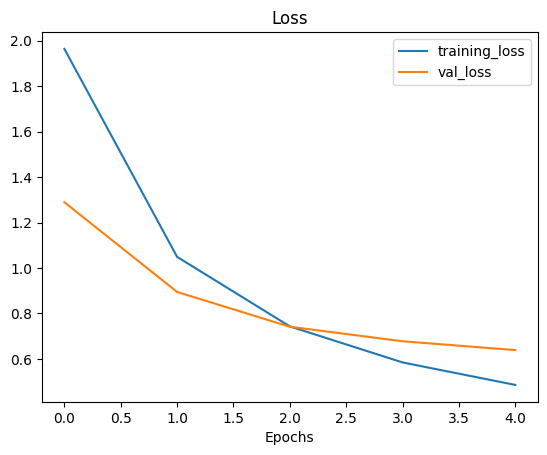

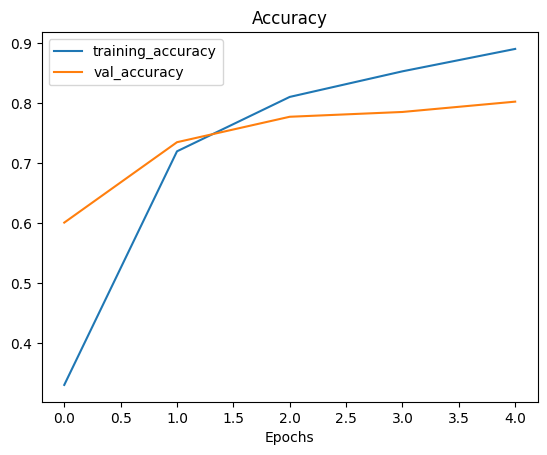

In [14]:
plot_loss_curves(MobileNet_history)

In [15]:
# MobileNet summary
MobileNet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1280)              2257984   
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 2270794 (8.66 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


save

In [16]:
MobileNet_model.save('model')

In [17]:
# Load the model
loaded_model = tf.keras.models.load_model("model", custom_objects={'KerasLayer': hub.KerasLayer})


In [18]:

# Define image size (should match your model's input)
IMG_SIZE = (224, 224)

# Load and preprocess the image
img = image.load_img("/content/10_food_classes_10_percent/test/ramen/1000325.jpg", target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Normalize the image
img_array /= 255.0


Predict

In [19]:
# Predict on the image
predictions = loaded_model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions, axis=-1)
print(f"Predicted class: {predicted_class}")


1/1 [==============================] - 2s 2s/step
Predicted class: [7]


In [20]:
class_names = ["chicken_curry", "chicken_wings","fried_rice", "griled_sallmon", "hamburger", "ice_cream", "pizze", "ramen", "steak", "sushi"]
print(f"Predicted label: {class_names[predicted_class[0]]}")


Predicted label: ramen


Compared with other models, mobilenet_v2_100_224/feature_vector is more accurate.

# 2. Name 3 different image classification models on TensorFlow Hub that we haven't used.

[yolo-v8](https://www.kaggle.com/models/umeradnaan/yolo-v8)

[inception-v3](https://www.kaggle.com/models/google/inception-v3)

[vision-transformer](https://www.kaggle.com/models/spsayakpaul/vision-transformer)

# 3. Build a model to classify images of two different things you've taken photos of.
  * You can use any feature extraction layer from TensorFlow Hub you like for this.
  * You should aim to have at least 10 images of each class, for example to build a fridge versus oven classifier, you'll want 10 images of fridges and 10 images of ovens.

In [21]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/ИИКб-22/Theoretical Foundations of Artificial Intelligence/Datasets/archive.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [22]:
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/train/"
test_dir = "/content/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 1275 images belonging to 2 classes.
Testing images:
Found 182 images belonging to 2 classes.


In [23]:
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [24]:
efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

In [25]:
# Create model
efficientnet_model = create_model(model_url=efficientnet_url, # use EfficientNetB0 TensorFlow Hub URL
                                  num_classes=train_data_10_percent.num_classes)

# Compile EfficientNet model
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model
efficientnet_history = efficientnet_model.fit(train_data_10_percent, # only use 10% of training data
                                              epochs=5, # train for 5 epochs
                                              steps_per_epoch=len(train_data_10_percent),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                                     # Track logs under different experiment name
                                                                                     experiment_name="efficientnetB0")])

Saving TensorBoard log files to: tensorflow_hub/efficientnetB0/20240917-011516
Epoch 1/5
40/40 [==============================] - 18s 224ms/step - loss: 0.3253 - accuracy: 0.8620 - val_loss: 0.2712 - val_accuracy: 0.8571
Epoch 2/5
40/40 [==============================] - 6s 145ms/step - loss: 0.1979 - accuracy: 0.9153 - val_loss: 0.2201 - val_accuracy: 0.9231
Epoch 3/5
40/40 [==============================] - 4s 106ms/step - loss: 0.1600 - accuracy: 0.9373 - val_loss: 0.1993 - val_accuracy: 0.9231
Epoch 4/5
40/40 [==============================] - 6s 149ms/step - loss: 0.1395 - accuracy: 0.9498 - val_loss: 0.1868 - val_accuracy: 0.9231
Epoch 5/5
40/40 [==============================] - 4s 105ms/step - loss: 0.1253 - accuracy: 0.9545 - val_loss: 0.1702 - val_accuracy: 0.9341


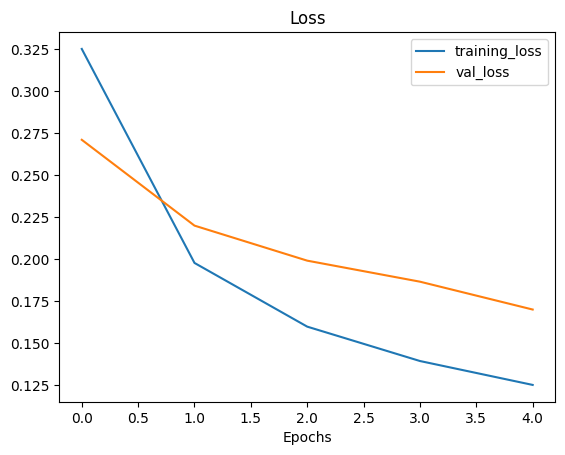

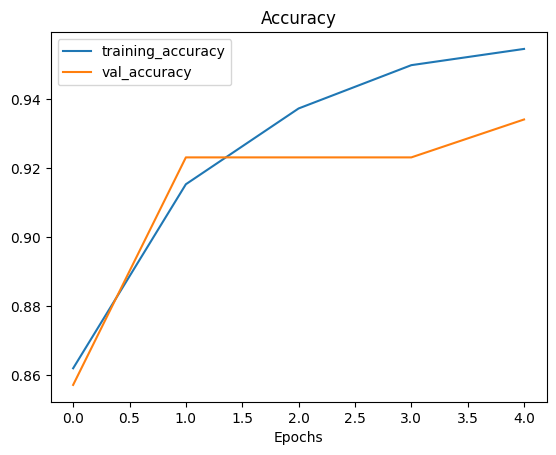

In [26]:
plot_loss_curves(efficientnet_history)

In [27]:
efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1280)              5919312   
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 2)                 2562      
                                                                 
Total params: 5921874 (22.59 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


In [28]:
efficientnet_model.save('model')

In [29]:
# Load the model
loaded_model = tf.keras.models.load_model("model", custom_objects={'KerasLayer': hub.KerasLayer})


In [41]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Define image size (should match your model's input)
IMG_SIZE = (224, 224)

# Load and preprocess the image
img = image.load_img("/content/test/daisy/519880292_7a3a6c6b69_jpg.rf.4329ebaba670fde97cec43b151764ae3.jpg", target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Normalize the image
img_array /= 255.0


In [42]:
# Predict on the image
predictions = loaded_model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions, axis=-1)
print(f"Predicted class: {predicted_class}")


1/1 [==============================] - 0s 26ms/step
Predicted class: [0]


In [43]:
class_names = ["daisy", "dandelion"]
print(f"Predicted label: {class_names[predicted_class[0]]}")


Predicted label: daisy


#4. What is the current best performing model on ImageNet?
  * Hint: you might want to check [sotabench.com](https://www.sotabench.com) for this.

The current state-of-the-art on ImageNet is OmniVec(ViT). See a full comparison of 991 papers with code.
